In [88]:
# importing all the necessay libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [89]:
# Acessing the first data set on the  
df_clean=pd.read_csv("C:/Users/UNIQUE/Documents/capstone co19/covid_19_clean_complete.csv")
country_mapping = {
    "USA": "United States",
    "United States of America": "United States",
    "U.S.A.": "United States",
    'US':'United States',
    'UK':'United Kingdom',
    'UAE':'United Arab Emirates',
    'S. Korea':'South Korea',
    'DRC':'Democratic Republic of the Congo',
    'CAR':'Central African Republic'
}

df_clean['Country/Region'] = df_clean['Country/Region'].replace(country_mapping)
df_clean.head(30)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [90]:
df_clean.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [92]:
df_clean=df_clean.drop("Province/State",axis=1)
df_clean.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [93]:
df_clean["Date"]=pd.to_datetime(df_clean["Date"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [94]:
df_clean.columns.is_unique

True

In [95]:
df_clean.index.is_unique

True

In [96]:
df_clean.duplicated().sum()


0

In [97]:
df_clean

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [98]:
df_world=pd.read_csv("C:/Users/UNIQUE/Documents/capstone co19/worldometer_data.csv")
country_mapping = {
    "USA": "United States",
    "United States of America": "United States",
    "U.S.A.": "United States",
    'US':'United States',
    'UK':'United Kingdom',
    'UAE':'United Arab Emirates',
    'S. Korea':'South Korea',
    'DRC':'Democratic Republic of the Congo',
    'CAR':'Central African Republic'
}

df_world['Country/Region'] = df_world['Country/Region'].replace(country_mapping)
df_world

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,United States,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [99]:
df_world= df_world[["Country/Region","Population",]]

In [100]:
df=pd.merge(df_clean,df_world, on='Country/Region', how='left')

In [101]:
df.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,77278.0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0
5,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas,98010.0
6,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas,45236884.0
7,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe,2963811.0
8,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific,25528864.0
9,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific,25528864.0


In [102]:
avg=df['Population'].sum()/ len(df['Population'])
avg

31005372.40229885

In [103]:
df['Population']=df['Population'].fillna(avg)
df['Population'].isnull().sum()

0

In [104]:
df['TotalCases'] = df['Confirmed'].cumsum()
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977


In [105]:
df['TotalDeaths'] = df['Deaths'].cumsum()
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891


In [106]:
# the mortality ratio was calculated per day, which enbales us to determine the ratio of death in a day
df["MortalityRatio"]=(df["Deaths"]/df["Confirmed"])*100
df['MortalityRatio'] = df['MortalityRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302


In [107]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Population,TotalCases,TotalDeaths,MortalityRatio
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,4.906800e+04,4.906800e+04,4.906800e+04,49068.000000
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,3.611354e+07,1.731066e+08,1.021549e+07,2.225505
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,3.393800e+04,0.000000e+00,0.000000e+00,0.000000
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.118446e+06,2.479292e+06,7.438200e+04,0.000000
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,2.552886e+07,5.564676e+07,3.437830e+06,0.708630
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,3.777502e+07,2.874341e+08,1.834222e+07,2.895710
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,1.381345e+09,8.285085e+08,4.338490e+07,100.000000
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,9.311454e+07,2.260487e+08,1.274928e+07,4.071028


In [108]:
df.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
Population        0
TotalCases        0
TotalDeaths       0
MortalityRatio    0
dtype: int64

In [109]:
df["Case_per_capital"]=(df["TotalCases"]/df["Population"])
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000,0.000000
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000,0.000000
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000,0.000000
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000,0.000000
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497,3773.725071
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980,27.721191
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401,950.850476
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302,86.686974


In [110]:
df['D/Confirmed_Growth_Rate'] = df.groupby('Country/Region')['Confirmed'].pct_change() * 100
df['D/Confirmed_Growth_Rate'] = df['D/Confirmed_Growth_Rate'].replace([np.inf, -np.inf], np.nan)
df['D/Confirmed_Growth_Rate'] = df['D/Confirmed_Growth_Rate'].fillna(0)

In [111]:
df['D/Death_Rate'] = df.groupby('Country/Region')['Deaths'].pct_change() * 100
df['D/Death_Rate'] = df['D/Death_Rate'].replace([np.inf, -np.inf], np.nan)
df['D/Death_Rate'] = df['D/Death_Rate'].fillna(0)

In [112]:
df=df.drop("D/Death_Rate", axis=1)

In [113]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000,0.000000,0.000000
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000,0.000000,0.000000
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000,0.000000,0.000000
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000,0.000000,0.000000
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497,3773.725071,0.231750
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980,27.721191,0.594884
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401,950.850476,0.000000
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302,86.686974,0.597887


In [114]:
print(np.isinf(df['Case_per_capital']).sum())
print(df['Case_per_capital'].isnull().sum())

0
0


In [115]:
# Recovery Ratios
df['Recovery_Ratio'] = (df['Recovered'] / df['Confirmed']) * 100

# Active Cases Ratio
df['Active_Ratio'] = (df['Active'] / df['Confirmed']) * 100

# Time-based Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000,0.000000,0.000000,NaN,NaN,2020,1
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000,0.000000,0.000000,NaN,NaN,2020,1
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000,0.000000,0.000000,NaN,NaN,2020,1
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000,0.000000,0.000000,NaN,NaN,2020,1
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000,0.000000,0.000000,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497,3773.725071,0.231750,84.855491,13.526012,2020,7
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980,27.721191,0.594884,49.260792,22.176227,2020,7
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401,950.850476,0.000000,92.655367,5.367232,2020,7
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302,86.686974,0.597887,83.317208,15.853490,2020,7


In [116]:
df.isnull().sum()

Country/Region                 0
Lat                            0
Long                           0
Date                           0
Confirmed                      0
Deaths                         0
Recovered                      0
Active                         0
WHO Region                     0
Population                     0
TotalCases                     0
TotalDeaths                    0
MortalityRatio                 0
Case_per_capital               0
D/Confirmed_Growth_Rate        0
Recovery_Ratio             10059
Active_Ratio               10059
Year                           0
Month                          0
dtype: int64

In [117]:
df[['Recovery_Ratio', 'Active_Ratio']]=df[['Recovery_Ratio', 'Active_Ratio']].fillna(0)

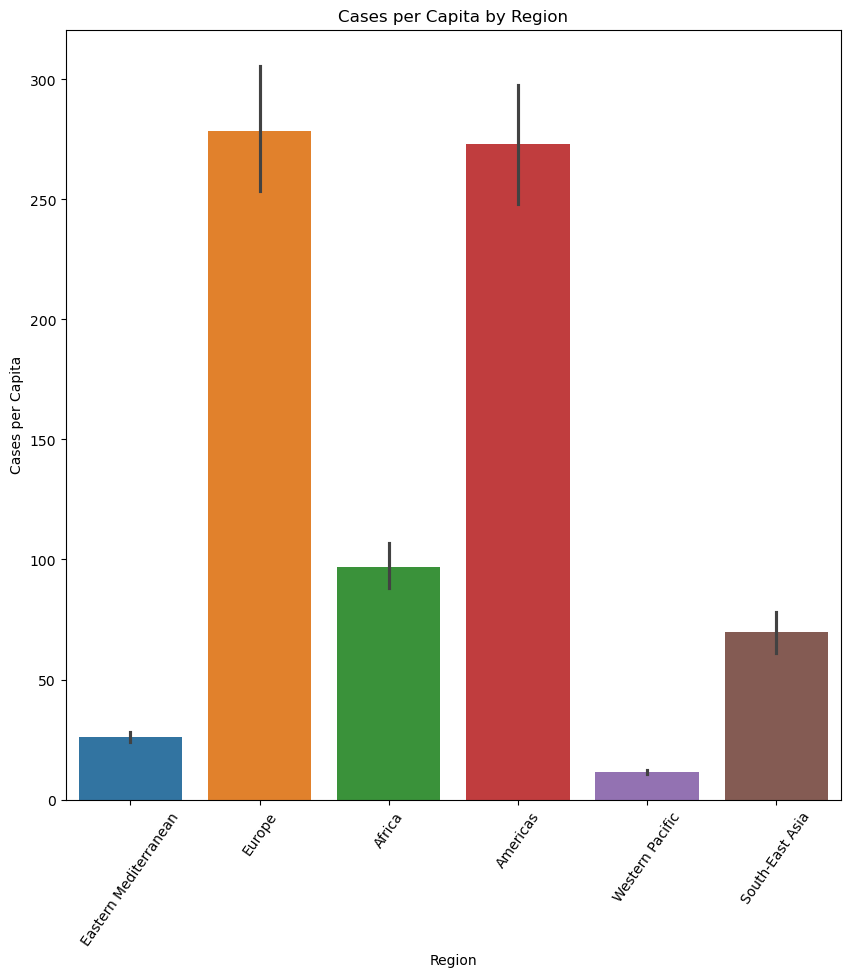

In [118]:
plt.figure(figsize=(10, 10))
sns.barplot(x='WHO Region', y='Case_per_capital',data=df, hue='WHO Region')
plt.title('Cases per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Cases per Capita')
plt.xticks(rotation=55)
plt.show()

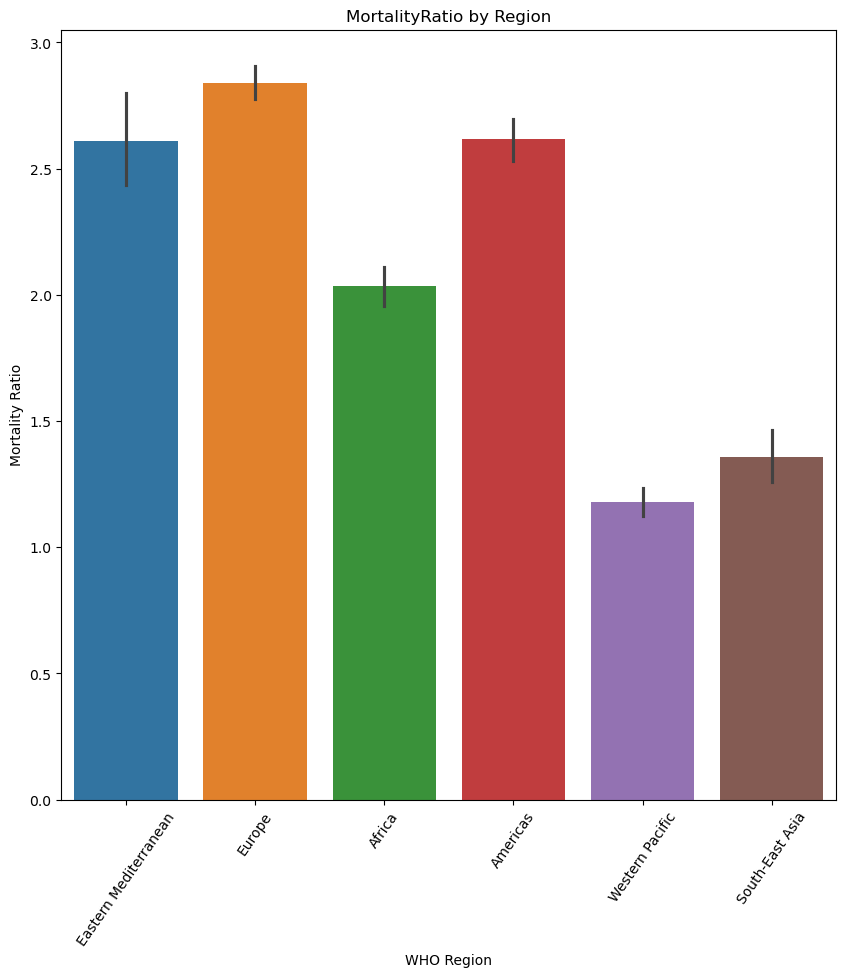

In [119]:
plt.figure(figsize=(10, 10))
sns.barplot(x='WHO Region', y='MortalityRatio',data=df, hue='WHO Region')
plt.title('MortalityRatio by Region')
plt.xlabel('WHO Region')
plt.ylabel('Mortality Ratio')
plt.xticks(rotation=55)
plt.show()

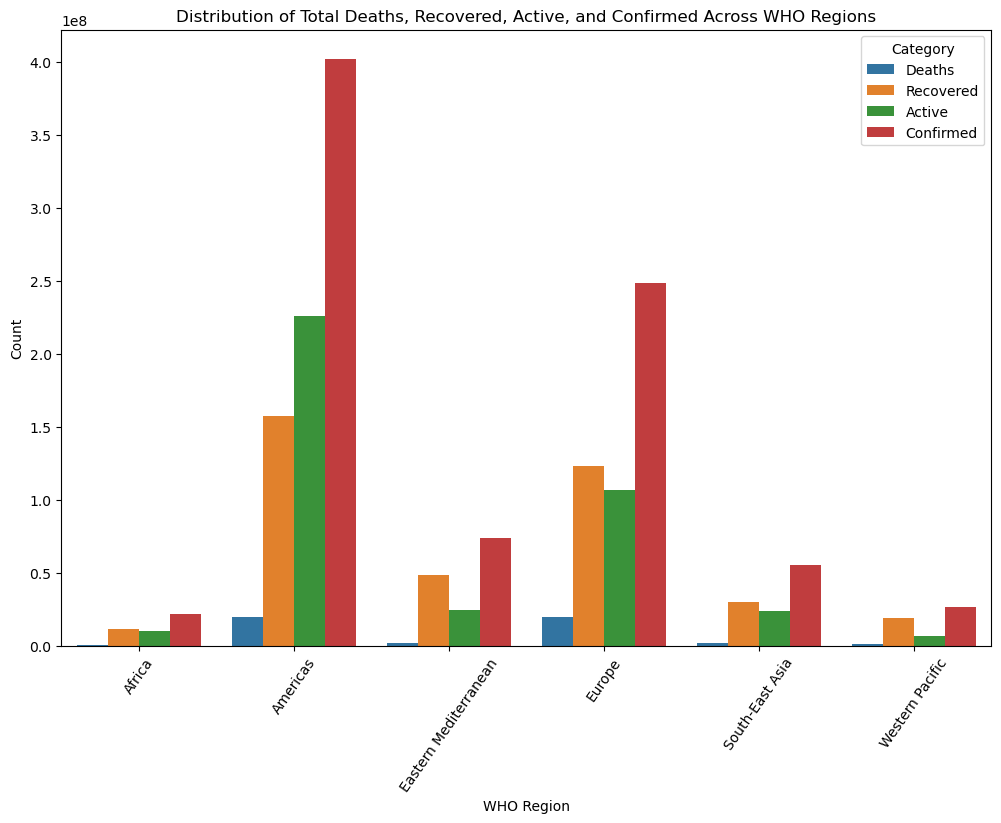

In [120]:
region_by_cases = df.groupby("WHO Region")[["Deaths", "Recovered","Active", "Confirmed"]].sum().reset_index()

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a bar plot with "WHO Region" on the x-axis and the values for Deaths, Recovered, and Confirmed
region_by_cases_melted = region_by_cases.melt(id_vars=["WHO Region"], var_name="Category", value_name="Count")

# Create the grouped bar plot
sns.barplot(x="WHO Region", y="Count", hue="Category", data=region_by_cases_melted)

# Set plot labels and title
plt.xlabel("WHO Region")
plt.ylabel("Count")
plt.title("Distribution of Total Deaths, Recovered, Active, and Confirmed Across WHO Regions")
plt.xticks(rotation=55)

# Show the plot
plt.show()

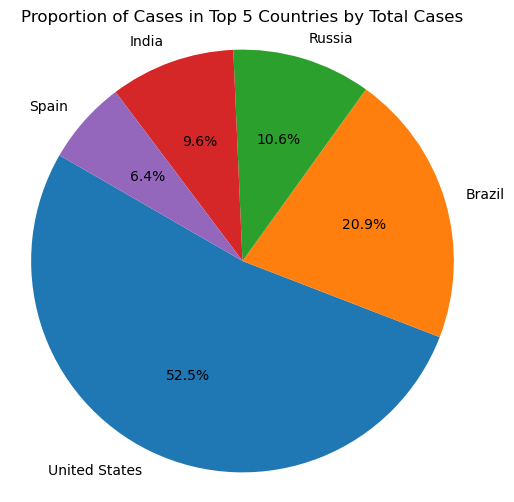

In [121]:
df_total= df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(6,6))
plt.pie(df_total["Confirmed"], labels=df_total['Country/Region'], autopct='%1.1f%%', startangle=150)
plt.title('Proportion of Cases in Top 5 Countries by Total Cases')
plt.axis('equal')
plt.show()

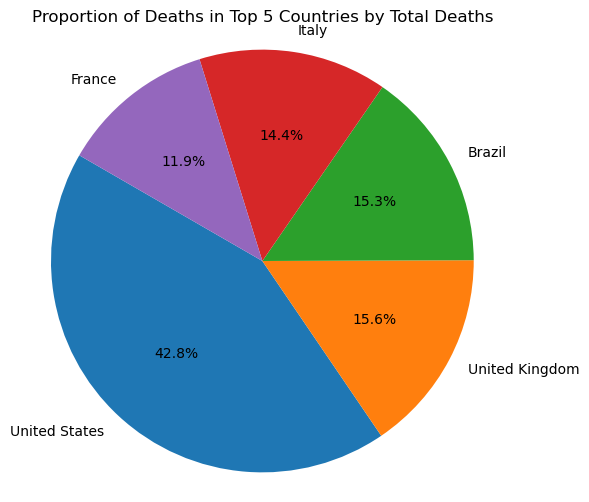

In [122]:
df_deaths=df.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(6,6))
plt.pie(df_deaths['Deaths'], labels=df_deaths['Country/Region'], autopct='%1.1f%%', startangle=150)
plt.title('Proportion of Deaths in Top 5 Countries by Total Deaths')
plt.axis('equal')
plt.show()

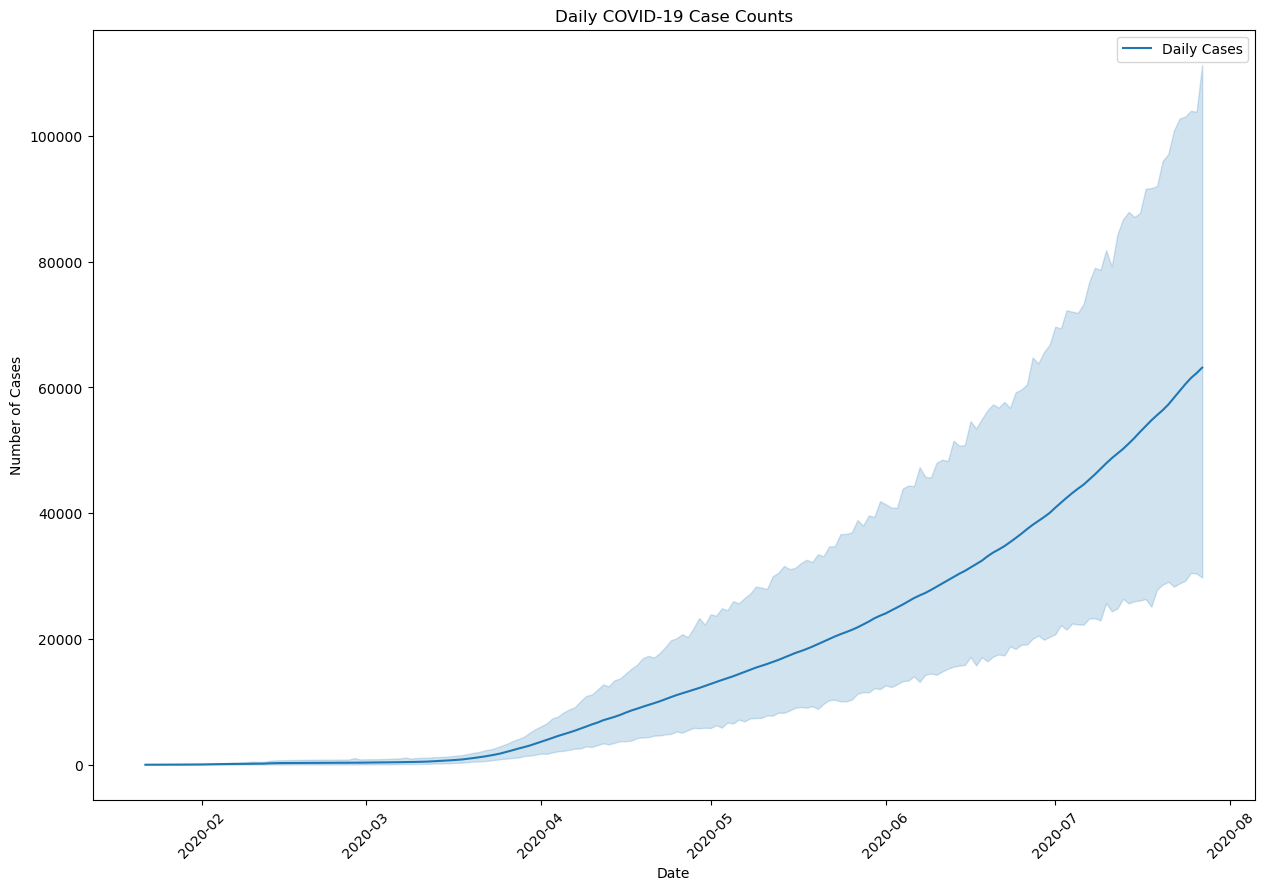

In [123]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Date', y='Confirmed', data=df, label='Daily Cases')
plt.title('Daily COVID-19 Case Counts')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [124]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497,3773.725071,0.231750,84.855491,13.526012,2020,7
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980,27.721191,0.594884,49.260792,22.176227,2020,7
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401,950.850476,0.000000,92.655367,5.367232,2020,7
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302,86.686974,0.597887,83.317208,15.853490,2020,7


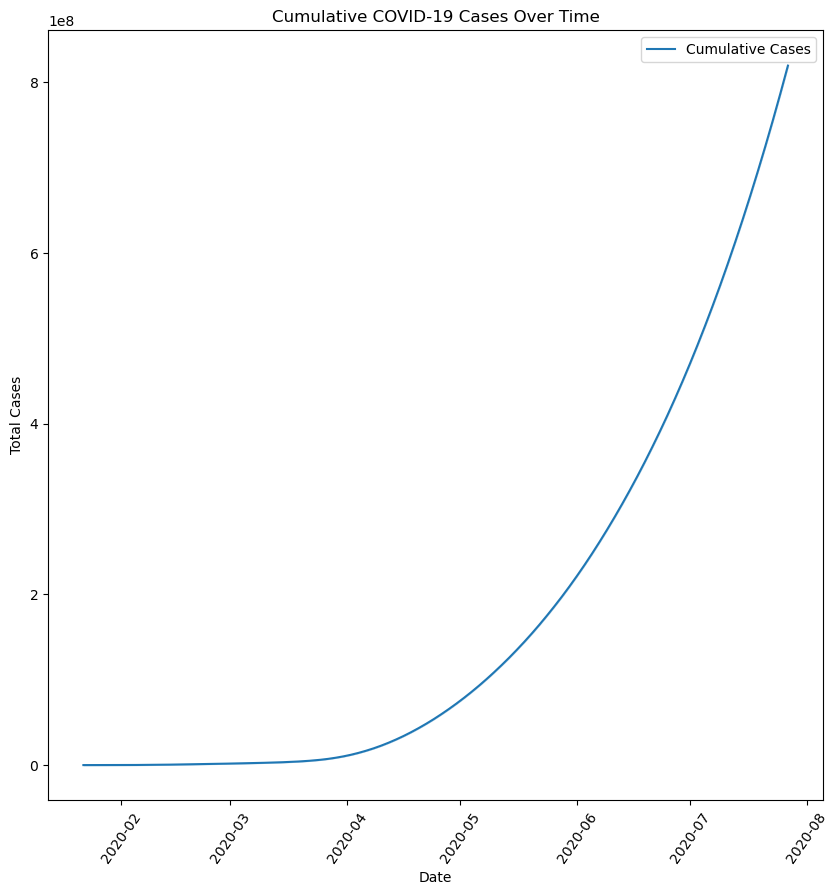

In [125]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="TotalCases", data=df, label='Cumulative Cases')
plt.title('Cumulative COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=55)
plt.legend()
plt.show()

In [126]:
df['Totalcases by region'] = df.groupby("WHO Region")['Confirmed'].cumsum()
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month,Totalcases by region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497,3773.725071,0.231750,84.855491,13.526012,2020,7,21790968
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980,27.721191,0.594884,49.260792,22.176227,2020,7,74082892
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401,950.850476,0.000000,92.655367,5.367232,2020,7,21791322
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302,86.686974,0.597887,83.317208,15.853490,2020,7,248879793


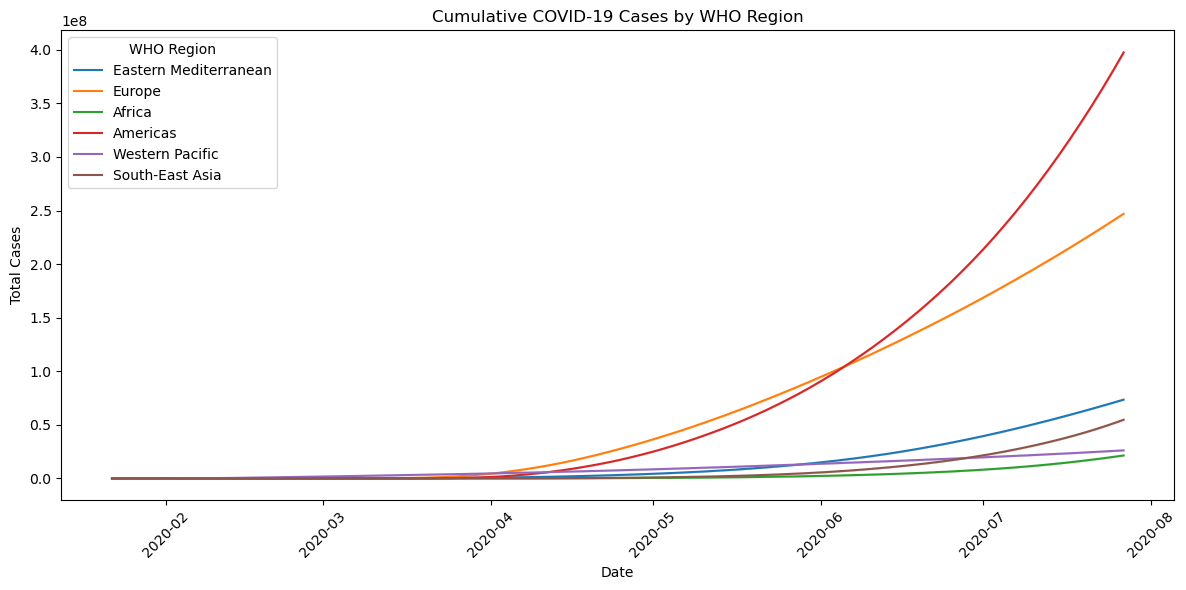

In [132]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Totalcases by region', hue='WHO Region', data=df,)
plt.title('Cumulative COVID-19 Cases by WHO Region')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title='WHO Region')
plt.tight_layout()
plt.show()

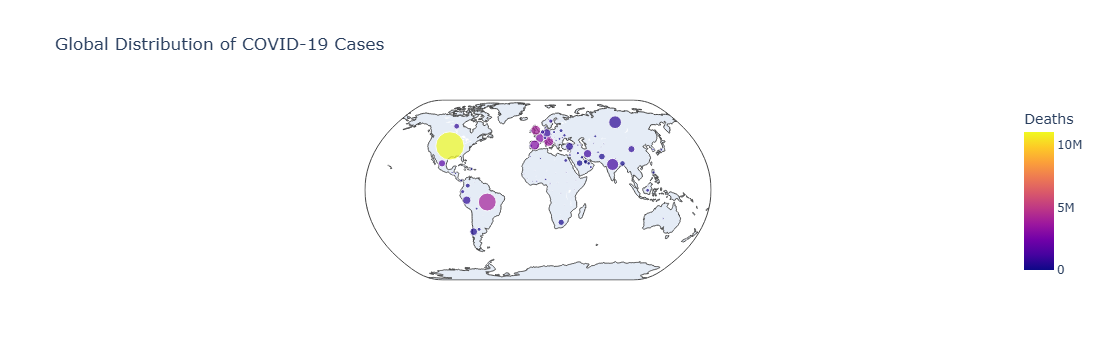

In [128]:
global_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig = px.scatter_geo(global_data, locations="Country/Region", locationmode='country names', 
                     size="Confirmed", color="Deaths", hover_name="Country/Region",
                     title='Global Distribution of COVID-19 Cases',
                     projection="natural earth")
fig.show()

In [129]:
df_clean['Daily Cases'] = df_clean['Confirmed'].diff().fillna(0)
df_clean

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Daily Cases
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0.0
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0.0
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0.0
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0.0
...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,855.0
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,826.0
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,-1337.0
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,6881.0


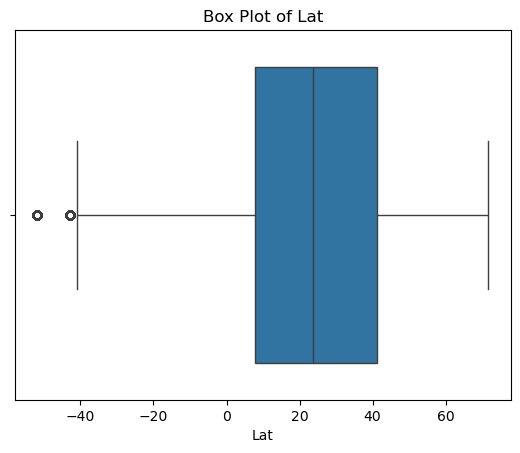

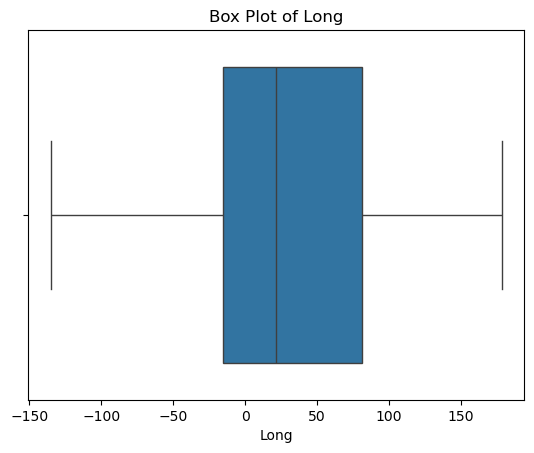

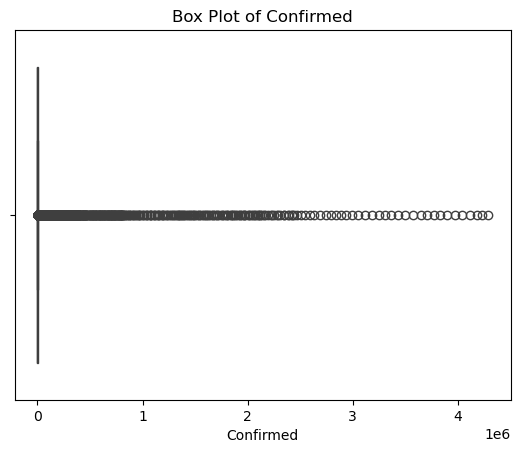

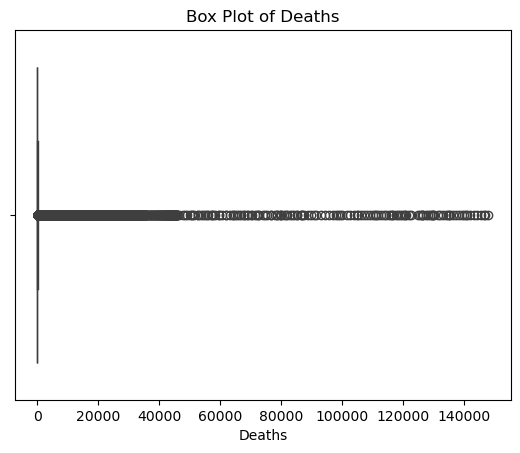

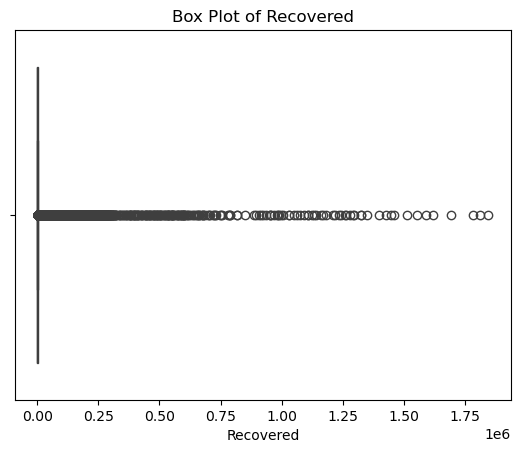

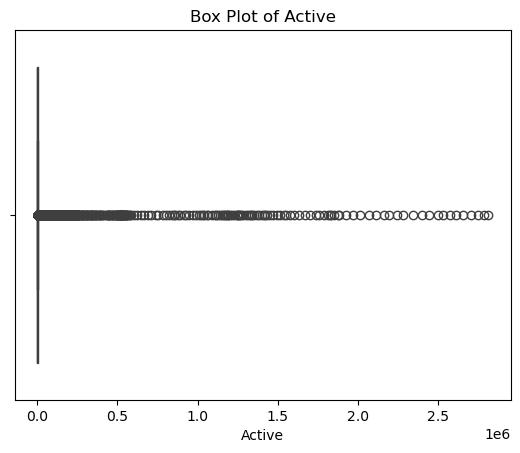

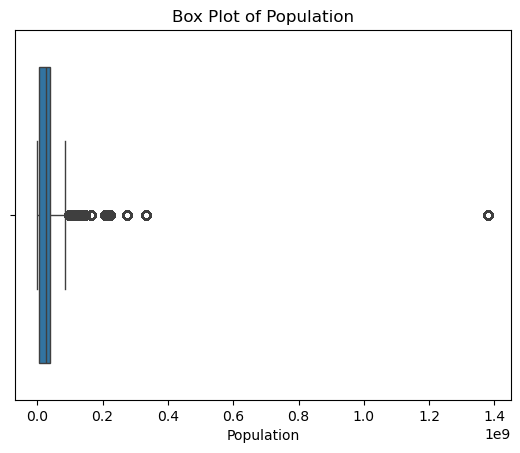

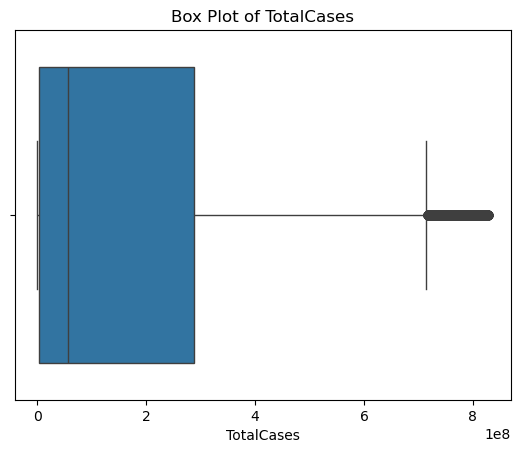

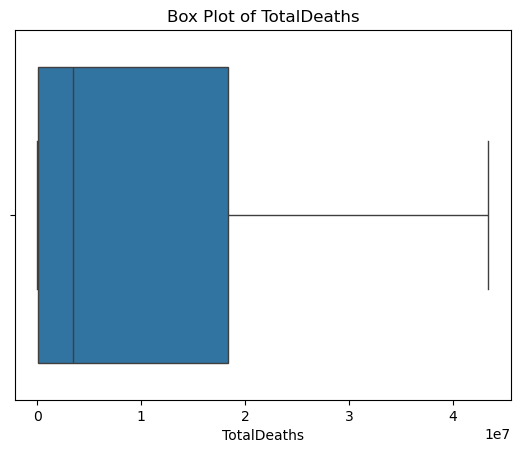

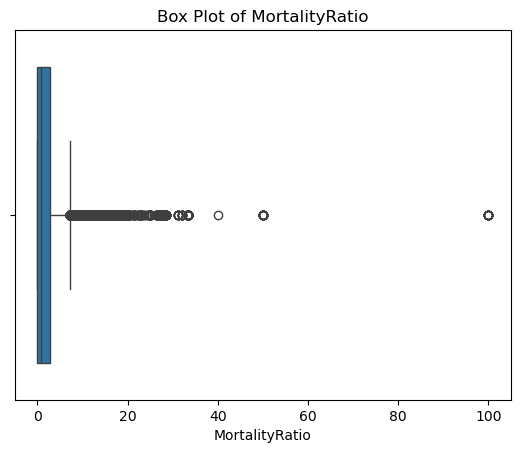

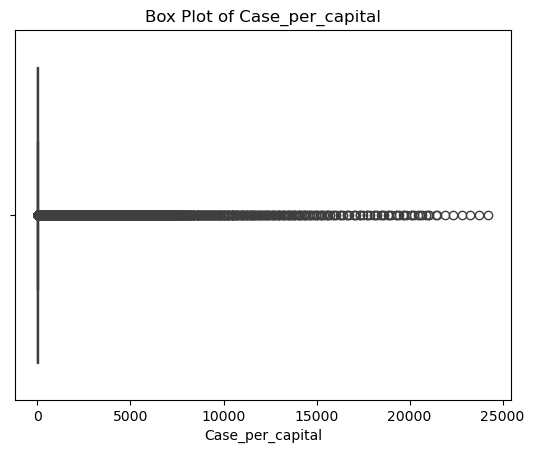

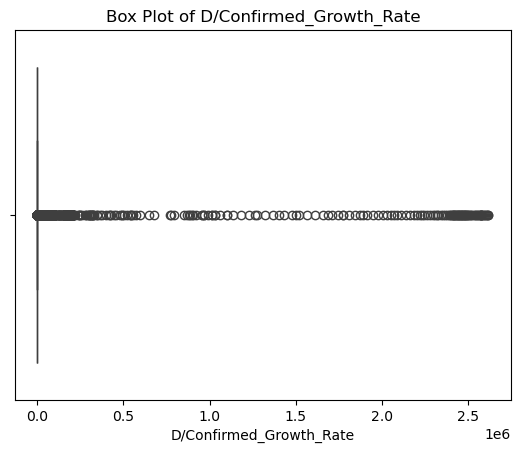

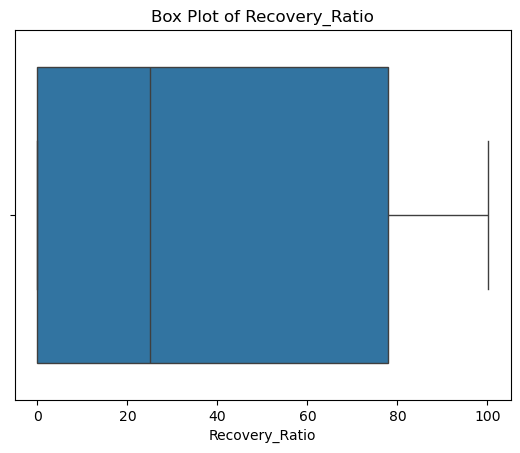

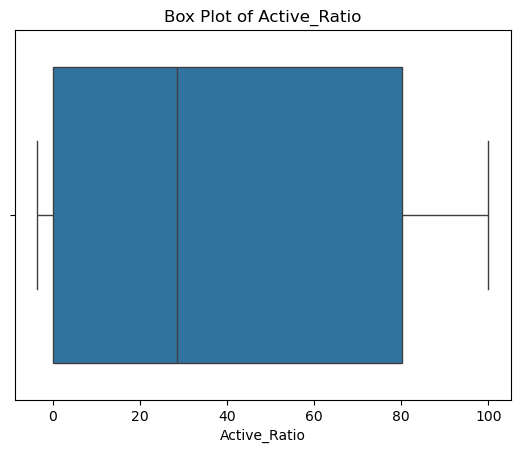

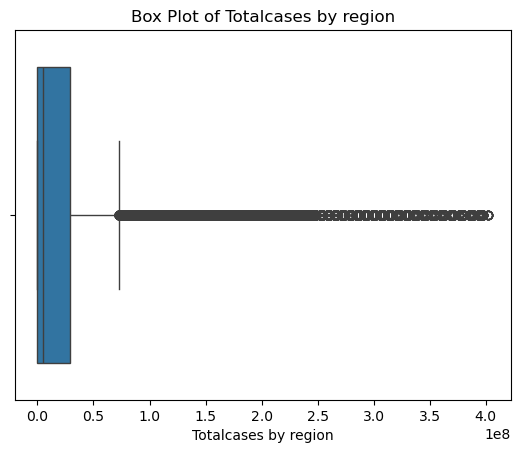

In [130]:
# Box plots to detect outliers
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [133]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
corr_matrix

,Lat,Long,Confirmed,Deaths,Recovered,Active,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Totalcases by region
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392,-0.004932,-0.000349,-0.000352,0.068401,0.059033,0.074925,0.019080,0.058979,0.154576
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688,0.051199,-0.001135,-0.001103,-0.161549,-0.073673,-0.028452,0.291316,-0.119985,-0.300116
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255,0.260427,0.141787,0.142526,0.098104,-0.018216,0.085614,0.031281,0.028559,0.201107
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858,0.213984,0.123632,0.126323,0.207223,-0.019851,0.275447,0.013142,0.038997,0.206505
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088,0.263728,0.183487,0.182964,0.085137,-0.019050,-0.006334,0.087563,-0.019536,0.230337
Active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000,0.227500,0.094596,0.095981,0.085429,-0.015075,0.124663,-0.011794,0.058484,0.153091
Population,-0.004932,0.051199,0.260427,0.213984,0.263728,0.227500,1.000000,0.000037,0.000008,0.032953,-0.056623,0.017754,-0.012572,0.059076,-0.023281
TotalCases,-0.000349,-0.001135,0.141787,0.123632,0.183487,0.094596,0.000037,1.000000,0.996719,0.142632,0.197098,0.037685,0.511193,-0.121266,0.672037
TotalDeaths,-0.000352,-0.001103,0.142526,0.126323,0.182964,0.095981,0.000008,0.996719,1.000000,0.152382,0.196396,0.039297,0.533797,-0.124906,0.672043
MortalityRatio,0.068401,-0.161549,0.098104,0.207223,0.085137,0.085429,0.032953,0.142632,0.152382,1.000000,0.017610,0.160357,0.088598,0.095394,0.200934


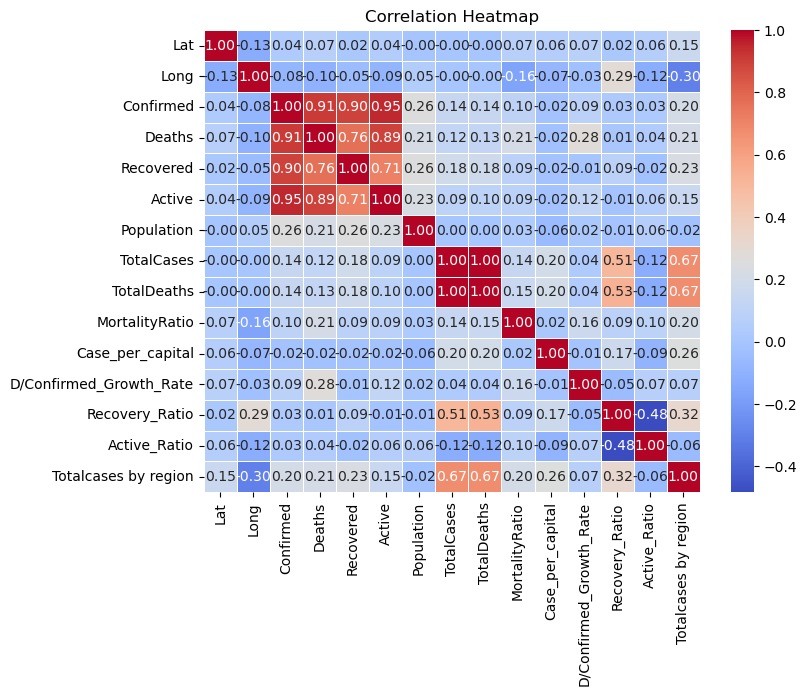

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add titles and labels
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [135]:
df.duplicated().sum()

0

In [136]:
df.duplicated().sum()

0

In [137]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month,Totalcases by region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,219544.0,828498697,43384341,1.618497,3773.725071,0.231750,84.855491,13.526012,2020,7,21790968
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,29886897.0,828500388,43384824,28.562980,27.721191,0.594884,49.260792,22.176227,2020,7,74082892
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,871326.0,828500742,43384831,1.977401,950.850476,0.000000,92.655367,5.367232,2020,7,21791322
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,9557468.0,828507977,43384891,0.829302,86.686974,0.597887,83.317208,15.853490,2020,7,248879793


In [138]:
# 7- day rolling average for cases
df['7-Day Avg Cases'] = df['Confirmed'].rolling(window=7).mean()
df['7-Day Avg Cases']= df['7-Day Avg Cases'].fillna(0)
# 14-day rolling average for deaths
df['14-Day Avg Deaths'] = df['Deaths'].rolling(window=14).mean()
df['14-Day Avg Deaths']= df['14-Day Avg Deaths'].fillna(0)

In [139]:
df.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,...,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month,Totalcases by region,7-Day Avg Cases,14-Day Avg Deaths
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
5,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas,98010.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
6,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas,45236884.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
7,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe,2963811.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
8,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific,25528864.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
9,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific,25528864.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0


In [140]:
encoder =LabelEncoder()
df["Country/Region"]= encoder.fit_transform(df["Country/Region"])
df.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Population,...,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month,Totalcases by region,7-Day Avg Cases,14-Day Avg Deaths
0,0,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,39009447.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
1,1,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2877470.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
2,2,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,43926079.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
3,3,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,77278.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
4,4,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,32956300.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
5,5,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas,98010.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
6,6,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas,45236884.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
7,7,40.06910,45.038200,2020-01-22,0,0,0,0,Europe,2963811.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
8,8,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific,25528864.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0
9,8,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific,25528864.0,...,0.0,0.0,0.0,0.0,0.0,2020,1,0,0.0,0.0


In [141]:
df= df.drop("WHO Region", axis=1)
df=df.drop("Lat", axis=1)
df=df.drop("Long", axis=1)

In [142]:
df=df.drop("14-Day Avg Deaths", axis=1)

In [143]:
df

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Recovery_Ratio,Active_Ratio,Year,Month,Totalcases by region,7-Day Avg Cases
0,0,2020-01-22,0,0,0,0,39009447.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0,0.000000
1,1,2020-01-22,0,0,0,0,2877470.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0,0.000000
2,2,2020-01-22,0,0,0,0,43926079.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0,0.000000
3,3,2020-01-22,0,0,0,0,77278.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0,0.000000
4,4,2020-01-22,0,0,0,0,32956300.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,144,2020-07-27,865,14,734,117,219544.0,828498697,43384341,1.618497,3773.725071,0.231750,84.855491,13.526012,2020,7,21790968,1234.857143
49064,184,2020-07-27,1691,483,833,375,29886897.0,828500388,43384824,28.562980,27.721191,0.594884,49.260792,22.176227,2020,7,74082892,1221.714286
49065,38,2020-07-27,354,7,328,19,871326.0,828500742,43384831,1.977401,950.850476,0.000000,92.655367,5.367232,2020,7,21791322,748.857143
49066,165,2020-07-27,7235,60,6028,1147,9557468.0,828507977,43384891,0.829302,86.686974,0.597887,83.317208,15.853490,2020,7,248879793,1780.571429


In [146]:
# Define features (x) and target (y)
y= df["Confirmed"]
x= df.drop("Confirmed", axis=1)

In [147]:
df["Date"]= pd.to_datetime(df["Date"])
df["Date"]= df["Date"].map(pd.Timestamp.toordinal)
X_train,X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)
y_pred= dt_model.predict(X_test)

In [148]:
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse}")

RMSE: 3021.38
MAE: 353.25
R² Score: 1.00
Mean Squared Error (MSE): 9128720.716221724


In [154]:
# Prepare data (convert date to numerical format)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)
# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
# Train the model on the training data
dt_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = dt_model.predict(X_test)
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse}")

RMSE: 3021.38
MAE: 353.25
R² Score: 1.00
Mean Squared Error (MSE): 9128720.716221724


In [150]:
df["Date"]= pd.to_datetime(df["Date"])
df["Date"]= df["Date"].map(pd.Timestamp.toordinal)
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)
y_pred= dt_model.predict(X_test)

In [151]:
df=df.drop("Recovery_Ratio", axis=1)
df=df.drop("Active_Ratio", axis=1)

In [152]:
df

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Population,TotalCases,TotalDeaths,MortalityRatio,Case_per_capital,D/Confirmed_Growth_Rate,Year,Month,Totalcases by region,7-Day Avg Cases
0,0,719163,0,0,0,0,39009447.0,0,0,0.000000,0.000000,0.000000,2020,1,0,0.000000
1,1,719163,0,0,0,0,2877470.0,0,0,0.000000,0.000000,0.000000,2020,1,0,0.000000
2,2,719163,0,0,0,0,43926079.0,0,0,0.000000,0.000000,0.000000,2020,1,0,0.000000
3,3,719163,0,0,0,0,77278.0,0,0,0.000000,0.000000,0.000000,2020,1,0,0.000000
4,4,719163,0,0,0,0,32956300.0,0,0,0.000000,0.000000,0.000000,2020,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,144,719163,865,14,734,117,219544.0,828498697,43384341,1.618497,3773.725071,0.231750,2020,7,21790968,1234.857143
49064,184,719163,1691,483,833,375,29886897.0,828500388,43384824,28.562980,27.721191,0.594884,2020,7,74082892,1221.714286
49065,38,719163,354,7,328,19,871326.0,828500742,43384831,1.977401,950.850476,0.000000,2020,7,21791322,748.857143
49066,165,719163,7235,60,6028,1147,9557468.0,828507977,43384891,0.829302,86.686974,0.597887,2020,7,248879793,1780.571429


In [153]:
df["Date"]= pd.to_datetime(df["Date"])
df["Date"]= df["Date"].map(pd.Timestamp.toordinal)
X_train,X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)
y_pred= dt_model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse}")

RMSE: 3021.38
MAE: 353.25
R² Score: 1.00
Mean Squared Error (MSE): 9128720.716221724
